# Telco Customer Churn Classification

# Overview

This project focuses on analyzing customer behavior and predicting customer churn using the Telco Customer Churn dataset.
The dataset contains demographic information, subscription details, service usage patterns, and billing data for telecom customers.

The main objective is to:

Perform Exploratory Data Analysis (EDA)

Apply Feature Engineering & Encoding

Train Machine Learning classification models

Predict whether a customer is likely to churn (leave the service) or not

This project is suitable for binary classification tasks and business-driven churn analysis.

# Feature Description

The features are categorized below to provide a clear understanding of the dataset variables:

## 1. Customer Demographics

Basic information describing the customer:

gender: Customer gender (Male / Female).

SeniorCitizen: Whether the customer is a senior citizen (0 = No, 1 = Yes).

Partner: Whether the customer has a partner.

Dependents: Whether the customer has dependents.

- These features help understand customer lifestyle and stability.

## 2. Account & Subscription Information

Details related to the customer’s subscription and tenure:

tenure: Number of months the customer has stayed with the company.

rank_tenure: Categorized tenure feature (New / Medium / Old).

Stability: Derived feature indicating customer stability (Stable / Unstable).

Contract: Type of contract (Month-to-month, One year, Two year).

PaperlessBilling: Whether the customer uses paperless billing.

PaymentMethod: Payment method used by the customer.

-Tenure-based features are highly influential in churn prediction.

## 3. Services Used

Information about telecom services subscribed by the customer:

PhoneService: Whether the customer has phone service.

MultipleLines: Whether the customer has multiple phone lines.

InternetService: Type of internet service (DSL, Fiber optic, No).

OnlineSecurity: Whether online security service is enabled.

OnlineBackup: Whether online backup service is enabled.

DeviceProtection: Whether device protection is enabled.

TechSupport: Whether technical support service is enabled.

StreamingTV: Whether streaming TV service is enabled.

StreamingMovies: Whether streaming movies service is enabled.

-These features strongly reflect customer engagement and satisfaction.

## 4. Billing & Charges

Financial information related to the customer account:

MonthlyCharges: The amount charged to the customer monthly.

TotalCharges: Total amount charged to the customer over the entire tenure.

rank_MonthlyCharges_binary: Binary feature indicating high or low monthly charges based on median value.

-Pricing and cost sensitivity are major churn drivers.

## 5. Target Variable

The dependent variable used for prediction:

Churn:

Yes (1) → Customer left the company

No (0) → Customer stayed

-This is the target variable used for binary classification.

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

## 2. Load and Explore Data

In [ ]:
data = pd.read_csv(r"C:\Users\joox2\OneDrive\Desktop\univ lec\ML\Projects\New folder\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.shape

(7043, 21)

In [ ]:
data.drop(['customerID'], axis=1, inplace=True)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
data.shape

(7043, 20)

## 3. Data Preprocessing

### 3.1 Handle Missing Values

In [ ]:
data["TotalCharges"] = data["TotalCharges"].replace({" ": np.nan})
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3.2 Handle Duplicates

In [ ]:
data.duplicated().sum()

np.int64(22)

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

### 3.3 Outliers Detection

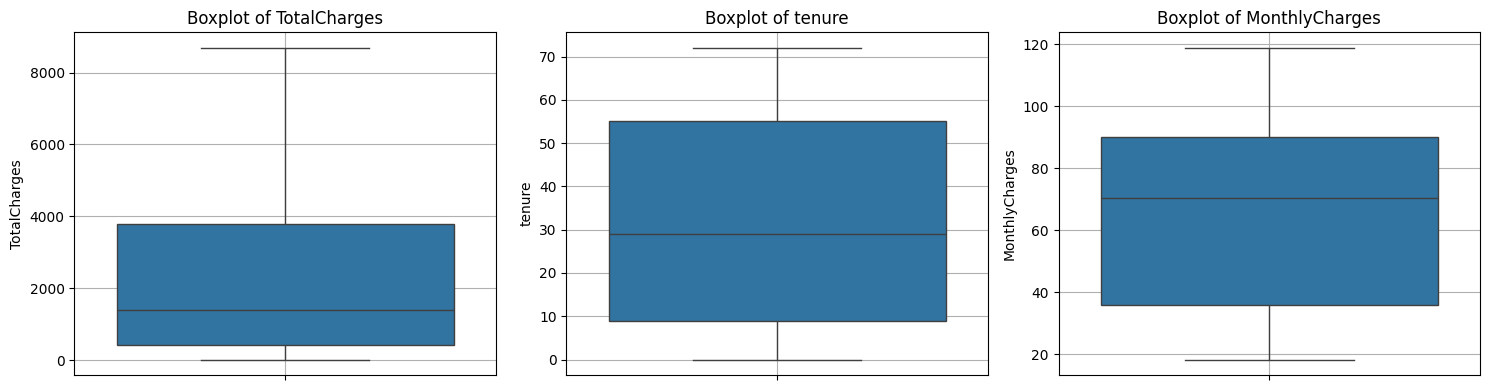

In [ ]:
numeric_col = ["TotalCharges", "tenure", "MonthlyCharges"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(numeric_col):
    sns.boxplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(True)
plt.tight_layout()
plt.show()

### 3.4 Clean Categorical Values

In [ ]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for col in cols:
    data[col] = data[col].replace({"No internet service": "No"})
data["MultipleLines"] = data["MultipleLines"].replace({"No phone service": "No"})

## 4. Feature Engineering

In [ ]:
bins = [0, 6, 24, 74]
labels = ["New", "Medium", "Old"]
data["rank_tenure"] = pd.cut(data["tenure"], bins=bins, labels=labels)
data["Stability"] = np.where(data["tenure"] > 24, "Stable", "unstable")
data["rank_MonthlyCharges_binary"] = np.where(data["MonthlyCharges"].median() > data["MonthlyCharges"], "High", "Low")

In [ ]:
data.isna().sum()

gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                         0
PhoneService                   0
MultipleLines                  0
InternetService                0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Contract                       0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges                 0
TotalCharges                   0
Churn                          0
rank_tenure                   11
Stability                      0
rank_MonthlyCharges_binary     0
dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

## 5. Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

labelencoder = LabelEncoder()
col_with_labelencoder = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines", "gender", "Partner", "Dependents", "PhoneService", "InternetService", "Contract", "PaperlessBilling", "PaymentMethod"]
for col in col_with_labelencoder:
    data[col] = labelencoder.fit_transform(data[col])

col_with_ordinalencoder = ["rank_tenure", "Stability", "rank_MonthlyCharges_binary"]
ordinalencoder = OrdinalEncoder()
for col in col_with_ordinalencoder:
    data[col] = ordinalencoder.fit_transform(data[[col]])

## 6. Split Features and Target

In [ ]:
x = data.drop(["Churn"], axis=1)
y = data["Churn"]

## 7. Handle Imbalanced Data

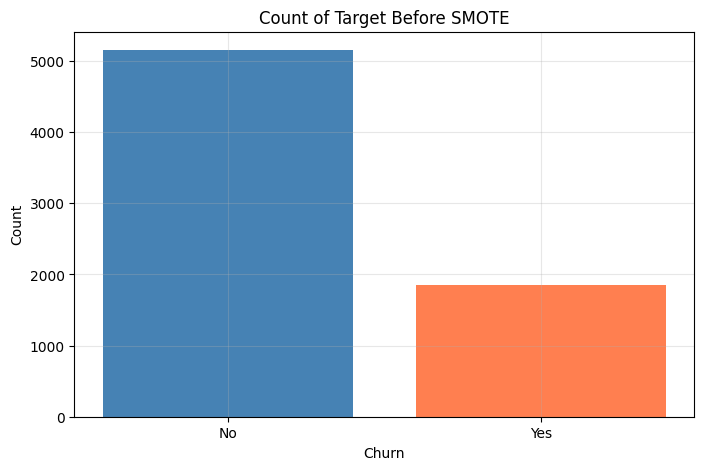

In [ ]:
Target = y.value_counts()
plt.figure(figsize=(8, 5))
plt.bar(Target.index, Target.values, color=['steelblue', 'coral'])
plt.grid(True, alpha=0.3)
plt.title("Count of Target Before SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto")
x_train_smoting, y_train_smoting = smote.fit_resample(x_train, y_train)

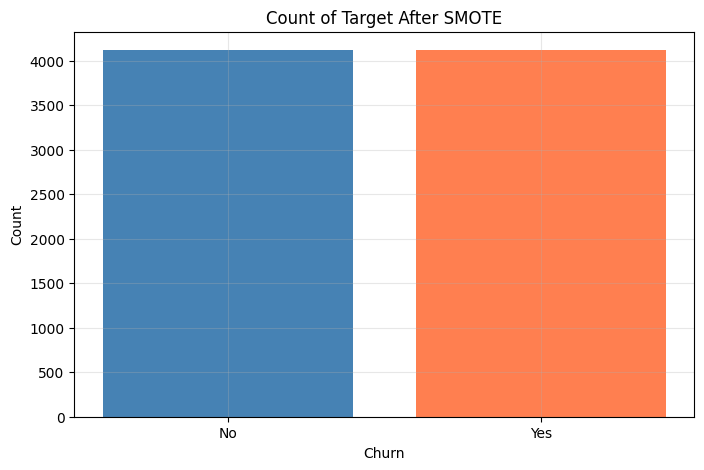

In [ ]:
Target = y_train_smoting.value_counts()
plt.figure(figsize=(8, 5))
plt.bar(Target.index, Target.values, color=['steelblue', 'coral'])
plt.grid(True, alpha=0.3)
plt.title("Count of Target After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

## 8. Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaler = scaler.fit_transform(x_train_smoting)
x_test_scaler = scaler.transform(x_test)

## 9. Machine Learning Models

### 9.1 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier(
    n_estimators=300, 
    max_depth=25, 
    class_weight="balanced", 
    min_samples_split=15, 
    min_samples_leaf=20, 
    random_state=42, 
    n_jobs=-1
)
RandomForestClassifierModel.fit(x_train_scaler, y_train_smoting)
y_predict_rf = RandomForestClassifierModel.predict(x_test_scaler)

RandomForestClassifierModel.score(x_train_scaler, y_train_smoting), RandomForestClassifierModel.score(x_test_scaler, y_test)

(0.8437651625424551, 0.7867332382310984)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_predict_rf,
    digits=4
))

              precision    recall  f1-score   support

          No     0.8853    0.8157    0.8491      1031
         Yes     0.5796    0.7062    0.6367       371

    accuracy                         0.7867      1402
   macro avg     0.7325    0.7610    0.7429      1402
weighted avg     0.8044    0.7867    0.7929      1402



In [ ]:
y_probs_rf = RandomForestClassifierModel.predict_proba(x_test_scaler)[:, 1]
accuracy_score(y_test, y_predict_rf), roc_auc_score(y_test, y_probs_rf)

(0.7867332382310984, 0.8407821156023122)

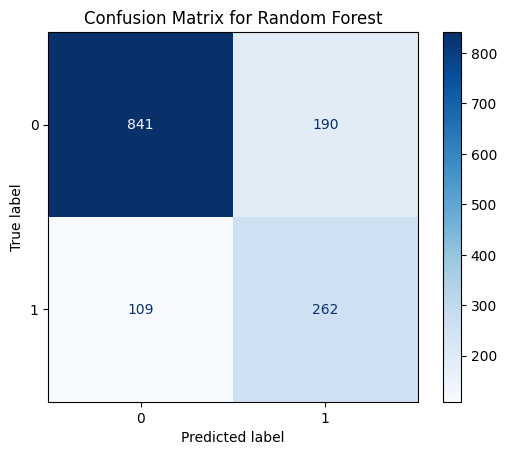

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()

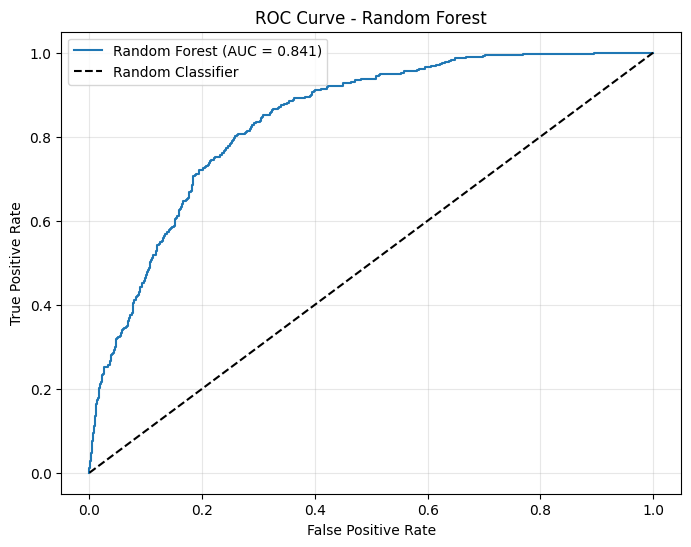

In [ ]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test.map({'No': 0, 'Yes': 1}), y_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_probs_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 9.2 Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=1000, kernel="rbf", gamma="auto", probability=True)
svc.fit(x_train_scaler, y_train_smoting)
y_predict_svc = svc.predict(x_test_scaler)

svc.score(x_train_scaler, y_train_smoting), svc.score(x_test_scaler, y_test)

(0.8905870936438622, 0.7681883024251069)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_predict_svc,
    digits=4
))

              precision    recall  f1-score   support

          No     0.8474    0.8351    0.8412      1031
         Yes     0.5596    0.5822    0.5707       371

    accuracy                         0.7682      1402
   macro avg     0.7035    0.7087    0.7060      1402
weighted avg     0.7713    0.7682    0.7696      1402



In [ ]:
y_probs_svc = svc.predict_proba(x_test_scaler)[:, 1]
accuracy_score(y_test, y_predict_svc), roc_auc_score(y_test, y_probs_svc)

(0.7681883024251069, 0.7801731237303955)

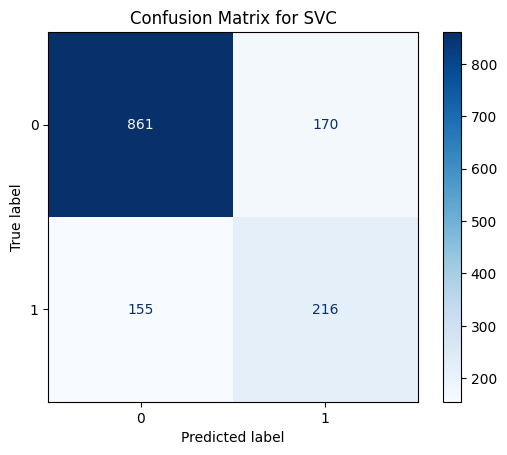

In [ ]:
cm = confusion_matrix(y_test, y_predict_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for SVC")
plt.show()

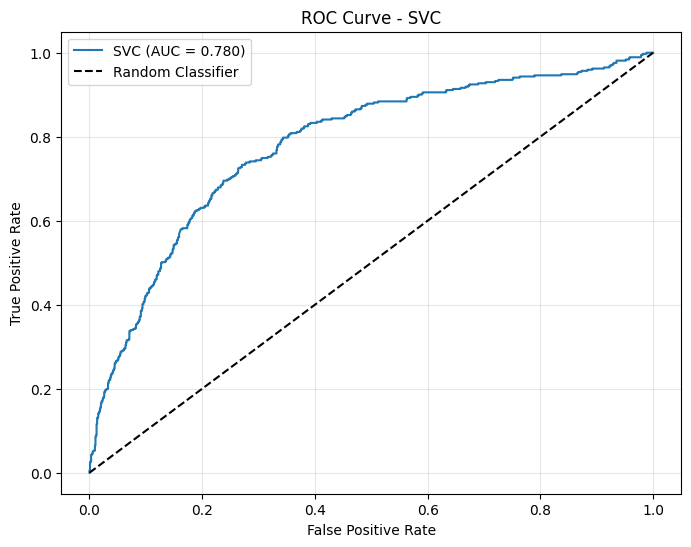

In [ ]:
fpr_svc, tpr_svc, _ = roc_curve(y_test.map({'No': 0, 'Yes': 1}), y_probs_svc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_score(y_test, y_probs_svc):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 9.3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=3000)
LR.fit(x_train_scaler, y_train_smoting)
y_predict_lr = LR.predict(x_test_scaler)

LR.score(x_train_scaler, y_train_smoting), LR.score(x_test_scaler, y_test)

(0.8159873847646774, 0.7724679029957204)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_predict_lr,
    digits=4
))

              precision    recall  f1-score   support

          No     0.8787    0.8012    0.8382      1031
         Yes     0.5563    0.6927    0.6170       371

    accuracy                         0.7725      1402
   macro avg     0.7175    0.7469    0.7276      1402
weighted avg     0.7934    0.7725    0.7796      1402



In [ ]:
y_probs_lr = LR.predict_proba(x_test_scaler)[:, 1]
accuracy_score(y_test, y_predict_lr), roc_auc_score(y_test, y_probs_lr)

(0.7724679029957204, 0.8333076253395415)

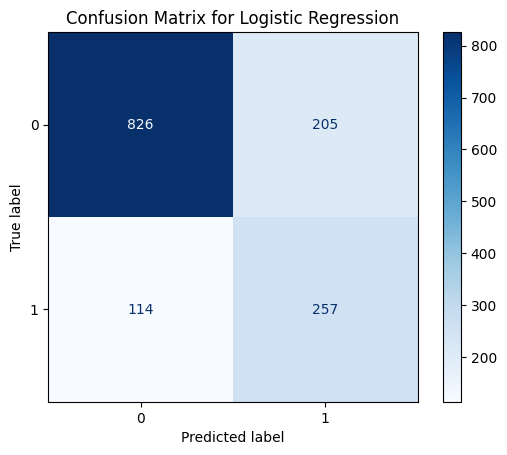

In [ ]:
cm = confusion_matrix(y_test, y_predict_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

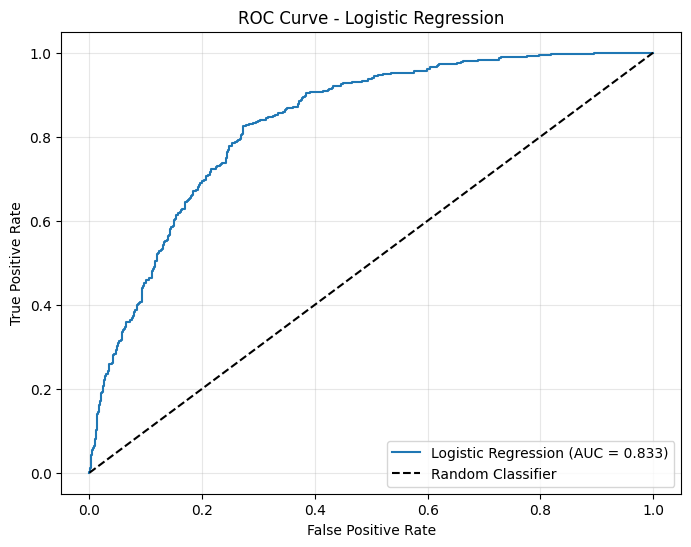

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test.map({'No': 0, 'Yes': 1}), y_probs_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_probs_lr):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 10. Model Comparison

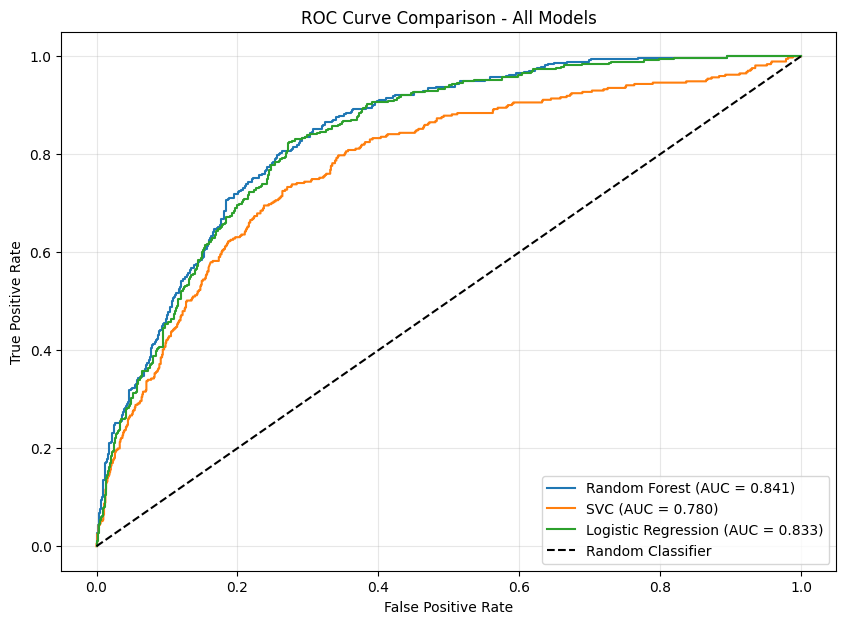

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_probs_rf):.3f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_score(y_test, y_probs_svc):.3f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_probs_lr):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - All Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVC', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_predict_rf),
        accuracy_score(y_test, y_predict_svc),
        accuracy_score(y_test, y_predict_lr)
    ],
    'ROC_AUC': [
        roc_auc_score(y_test, y_probs_rf),
        roc_auc_score(y_test, y_probs_svc),
        roc_auc_score(y_test, y_probs_lr)
    ]
})
results

,Model,Accuracy,ROC_AUC
0,Random Forest,0.786733,0.840782
1,SVC,0.768188,0.780173
2,Logistic Regression,0.772468,0.833308


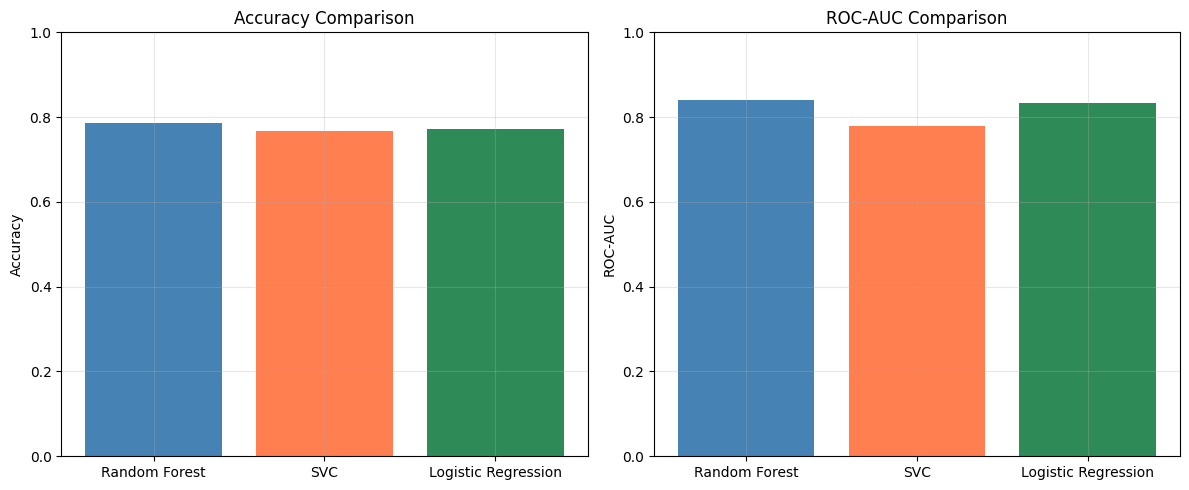

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(results['Model'], results['Accuracy'], color=['steelblue', 'coral', 'seagreen'])
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3)

axes[1].bar(results['Model'], results['ROC_AUC'], color=['steelblue', 'coral', 'seagreen'])
axes[1].set_title('ROC-AUC Comparison')
axes[1].set_ylabel('ROC-AUC')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()